# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [8]:
import os
import requests 
import tweepy
import pandas as pd 
from dotenv import load_dotenv


# load the .env file variables
load_dotenv()

#consumer_key = os.env.get("CONSUMER_KEY")
#consumer_secret = os.env.get("CONSUMER_SECRET")
#bearer_token= os.env.get("BEARER_TOKEN")

consumer_key = "o9CK6vHNHHQ84AVdEJniVejrK"
consumer_secret = "NcZEbK1XqyCnhVVEnqiUHTo2VGliqsFETYdr5LeqnYNLEnjUaa"
bearer_token ="AAAAAAAAAAAAAAAAAAAAAAyGdwEAAAAAyaYS%2BncXUUsAL%2BuFPG3IYlTYmbk%3D9e5lNkfChphvs0AMhVEvPw2I6ppG9xXOM6KAf8WaNqAgNuDpen"

# Creando cliente de Twitter

client = tweepy.Client( bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret,
                        return_type = requests.Response,
                        wait_on_rate_limit=True)

# Definiendo el query para Tweeter

query = '#100daysofcode (pandas OR python) -is:retweet'      

tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id','created_at','lang'],
                                     max_results=100)

In [2]:
tweets

<Response [200]>

In [3]:
tweets_dict = tweets.json() 

In [4]:
list(tweets_dict)

['data', 'meta']

In [5]:
tweets_data = tweets_dict['data'] 
df = pd.json_normalize(tweets_data)
df

,text,id,author_id,created_at,lang
0,#100DaysOfCode \nDay 1\nWorking with Variables...,1541852476030083073,1497908452685119489,2022-06-28T18:34:11.000Z,en
1,Do you need help in? \n#python\n#homeworkdue \...,1541852328503934976,1489379341591003141,2022-06-28T18:33:36.000Z,en
2,#javascript #python #nodejs #reactjs #backend ...,1541852180394680320,1521490635597000704,2022-06-28T18:33:00.000Z,qht
3,RT @stratorob: Israel's #AI-powered system tha...,1541851933857779713,2821451759,2022-06-28T18:32:01.000Z,en
4,"Hands-On Machine Learning with Scikit-Learn, K...",1541851914136162309,3068484222,2022-06-28T18:31:57.000Z,en
...,...,...,...,...,...
95,Day 20 #100DaysOfCode \n\nToday I learnt about...,1541841681808367616,1372875007647391744,2022-06-28T17:51:17.000Z,en
96,AWARD INTERNAZIONALE DONNA IMPRESA MAGAZINE 20...,1541841631103647744,1148705919347417088,2022-06-28T17:51:05.000Z,it
97,#weed #beuh #shit🔥dispo \n🍃Snap👻diablo_verte\n...,1541841606789267465,1541744765468811265,2022-06-28T17:50:59.000Z,fr
98,We are legit to offer you A grade in your\n✓nu...,1541841574895751171,1403337284125171712,2022-06-28T17:50:52.000Z,en


In [9]:
tweets_data

[{'text': '#100DaysOfCode \nDay 1\nWorking with Variables in Python to Manage Data. https://t.co/ejpHMr3Ykk',
  'id': '1541852476030083073',
  'author_id': '1497908452685119489',
  'created_at': '2022-06-28T18:34:11.000Z',
  'lang': 'en'},
 {'text': 'Do you need help in? \n#python\n#homeworkdue \n#chemistry\n#Onlineclass\n#Essaypay\n#Econometrics\n#Statistics\n#homework\n#essaywrite\n#Essayhelp\nCasestudy\n#Javascript\n#Maths \n#Philosophy\n#homeworkslave\n#Law\n#100DaysOfCode\n#WomenWhoCode\n#NodeJS\n#DEVCommunity \nKindly DM @JannyWriter1 https://t.co/35IkhTUzok',
  'id': '1541852328503934976',
  'author_id': '1489379341591003141',
  'created_at': '2022-06-28T18:33:36.000Z',
  'lang': 'en'},
 {'text': '#javascript #python #nodejs #reactjs #backend #frontend #webdeveloper #webdesign #100daysofcode #fullstack #typescrpt #golang #php #cplusplus #csharp #blockchain #solidity #ethereum #bitcoin #defi #dapp #linux #manjaro #ubuntu #fedora #debian #html #css #devops #cybersecurity',
  'id':

In [10]:
list(tweets_data[0])

['text', 'id', 'author_id', 'created_at', 'lang']

In [11]:
# Guardar el df en un archivo tipo csv
df.to_csv('../assets/coding-tweets.csv')



In [27]:
#import re
import re

# crear la funcion para contar los tweets que contienen las palabras pandas y python
# Aca definimos la funcion

def palabra_en_tweet(pal,twt):
    ret = 0
    pal = pal.lower()
    twt= twt.lower()
    esta = re.search(pal,twt)
    if esta:
        ret=1
    return ret
             



In [28]:
# Inicializamos unas listas para contar las palabras encontradas en los  tweets
# iterrows sirve para iterar sobre filas en pandas

[pan, pyt] = [0 , 0]

# Vamos a iterar el en dataframe para saber si las palabras buscadas estan en los tweets que leimos

for indice,fila in df.iterrows():
    pan += palabra_en_tweet('pandas', fila['text'])
    pyt += palabra_en_tweet('python', fila['text'])

print(pan)
print(pyt)    

1
100


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


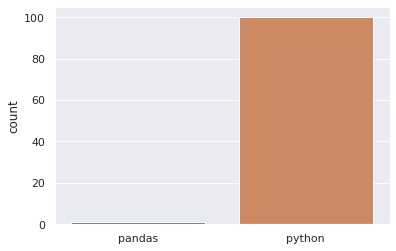

In [30]:
# Visualizar los datos
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set(color_codes=True)

# Lista de las eqiquetas para colocar
cab = ['pandas','python']

varx = sns.barplot(cab,[pan,pyt])
varx.set(ylabel='count')
plt.show()

In [ ]:
# Example reading the SQL database from here

# from dotenv import load_dotenv
# from sqlalchemy import create_engine
# import pandas as pd

# # load the .env file variables
# load_dotenv()

# connection_string = f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}?autocommit=true"
# engine = create_engine(connection_string)
# engine.connect()

# dataframe = pd.read_sql("Select * from books;", engine)
# print(dataframe.describe())

In [ ]:
# Example importing the CSV here

# dataframe = pd.read_csv('../path/to/file.csv')
# dataframe.describe()